# Compare Wavelet vs FRK surrogate pipelines (Marrel et al. Campbell2D)

This notebook loads:
- `results_wavelet.npz` from `01_run_pipeline.ipynb`
- `results_frk.npz` from `02_run_frk_pipeline.ipynb`

and produces:
- Difference maps (Wavelet − FRK) for selected Sobol maps
- rMAE comparison table by input


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
PROJECT_ROOT = Path.cwd().resolve()
if not (PROJECT_ROOT / "marrel_pipeline").exists():
    # If launched from notebooks/, go up one.
    PROJECT_ROOT = PROJECT_ROOT.parents[0]
    if not (PROJECT_ROOT / "marrel_pipeline").exists():
        # Fallback: go up two.
        PROJECT_ROOT = Path.cwd().resolve().parents[1]

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


from marrel_pipeline.plotting import plot_map, plot_index_grid

wave = np.load("results_wavelet.npz", allow_pickle=True)
frk = np.load("results_frk.npz", allow_pickle=True)

S_exact = wave["S_exact"]
ST_exact = wave["ST_exact"]

S_w = wave["S_hat"]
ST_w = wave["ST_hat"]

S_f = frk["S_hat"]
ST_f = frk["ST_hat"]

rmae_w = wave["rmae"]
rmae_f = frk["rmae"]

d = S_w.shape[0]
titles = [f"X{i+1}" for i in range(d)]


## rMAE comparison table (first-order)

In [3]:
import pandas as pd
df = pd.DataFrame({
    "input": titles,
    "rMAE_wavelet": rmae_w,
    "rMAE_frk": rmae_f,
    "delta(frk-wavelet)": rmae_f - rmae_w
})
df


,input,rMAE_wavelet,rMAE_frk,delta(frk-wavelet)
0,X1,0.383600,0.534002,0.150402
1,X2,0.096542,0.300668,0.204126
2,X3,0.291124,0.416446,0.125322
3,X4,0.083473,0.221698,0.138225
4,X5,1.289534,1.156668,-0.132866
5,X6,0.228667,0.180805,-0.047861
6,X7,0.088664,0.162721,0.074057
7,X8,0.185805,0.356687,0.170882


## Difference plots for total indices: Wavelet − FRK

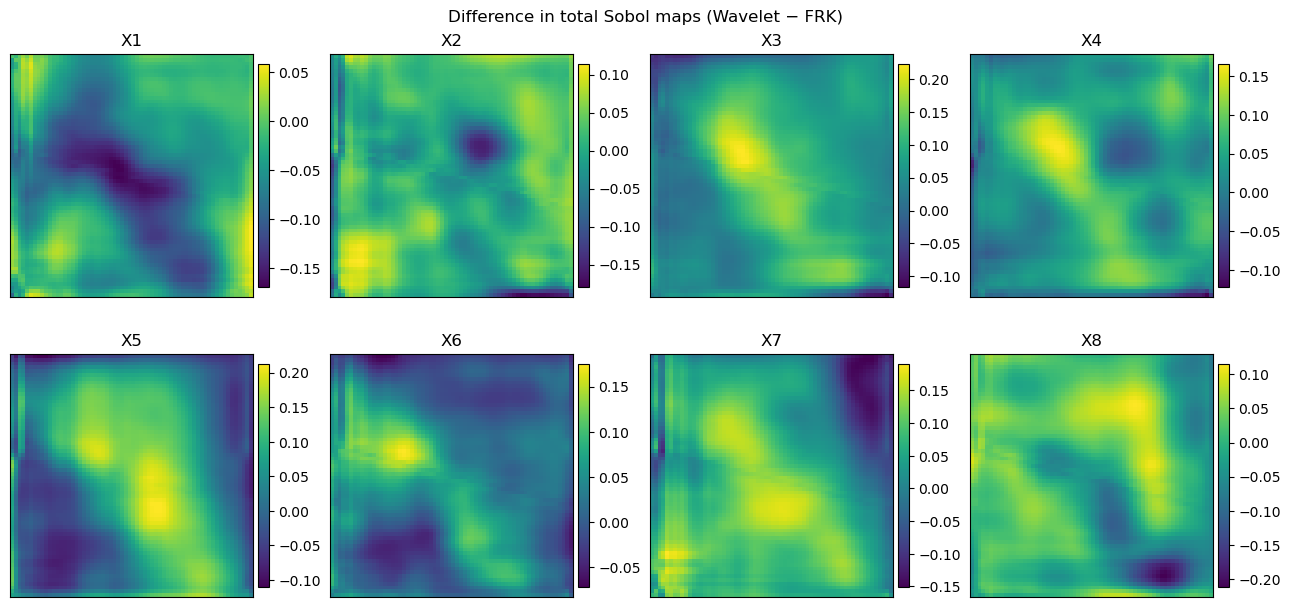

In [4]:
diff_ST = ST_w - ST_f
fig = plot_index_grid(diff_ST, titles, suptitle="Difference in total Sobol maps (Wavelet − FRK)", ncols=4)
plt.show()


## Side-by-side comparison for selected inputs

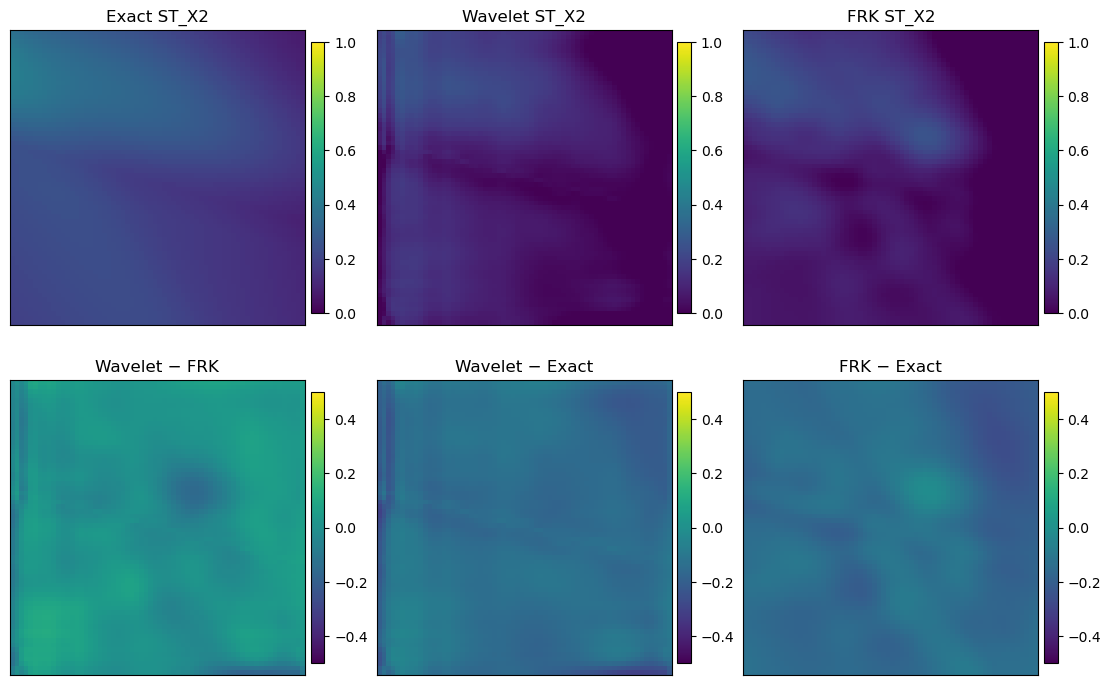

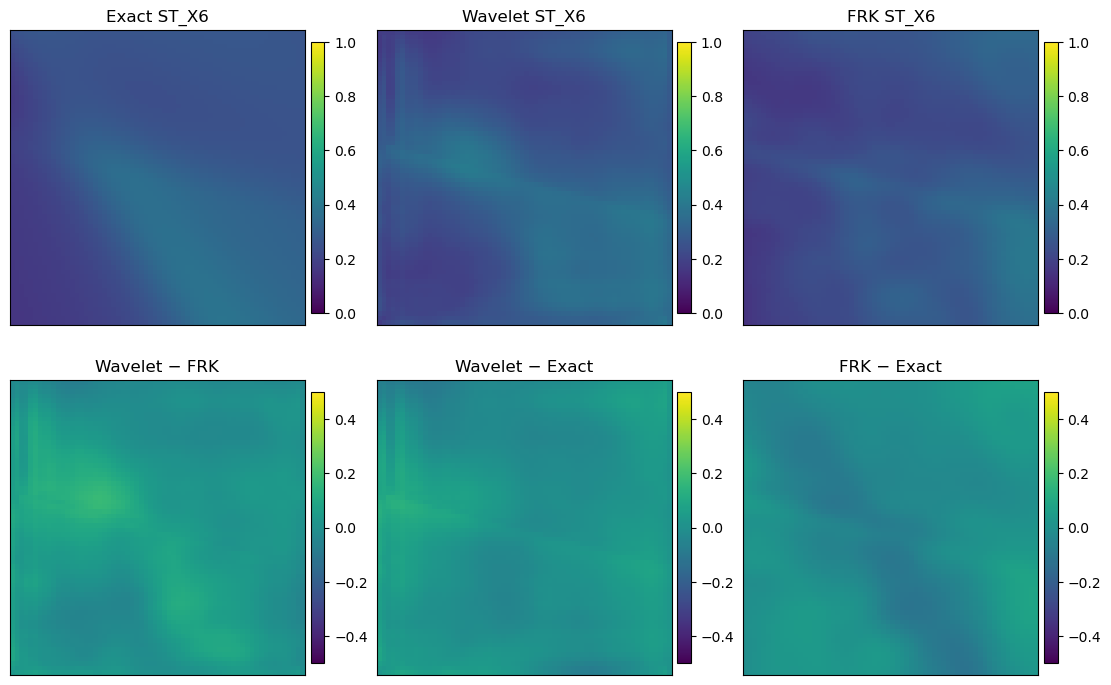

In [5]:
for idx, name in [(1,'X2'), (5,'X6')]:
    fig, axes = plt.subplots(2,3, figsize=(11,7), constrained_layout=True)
    vmin=0; vmax=1
    plot_map(axes[0,0], ST_exact[idx], f"Exact ST_{name}", vmin=vmin, vmax=vmax)
    plot_map(axes[0,1], ST_w[idx], f"Wavelet ST_{name}", vmin=vmin, vmax=vmax)
    plot_map(axes[0,2], ST_f[idx], f"FRK ST_{name}", vmin=vmin, vmax=vmax)
    plot_map(axes[1,1], ST_w[idx]-ST_exact[idx], f"Wavelet − Exact", vmin=-0.5, vmax=0.5)
    plot_map(axes[1,2], ST_f[idx]-ST_exact[idx], f"FRK − Exact", vmin=-0.5, vmax=0.5)
    plot_map(axes[1,0], ST_w[idx]-ST_f[idx], f"Wavelet − FRK", vmin=-0.5, vmax=0.5)
    for ax in axes.flat:
        if ax.images:
            fig.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.02)
    plt.show()


## Paper-style grid: S2, ST2, S6, ST6 (Exact / Wavelet / FRK / Wavelet−FRK)

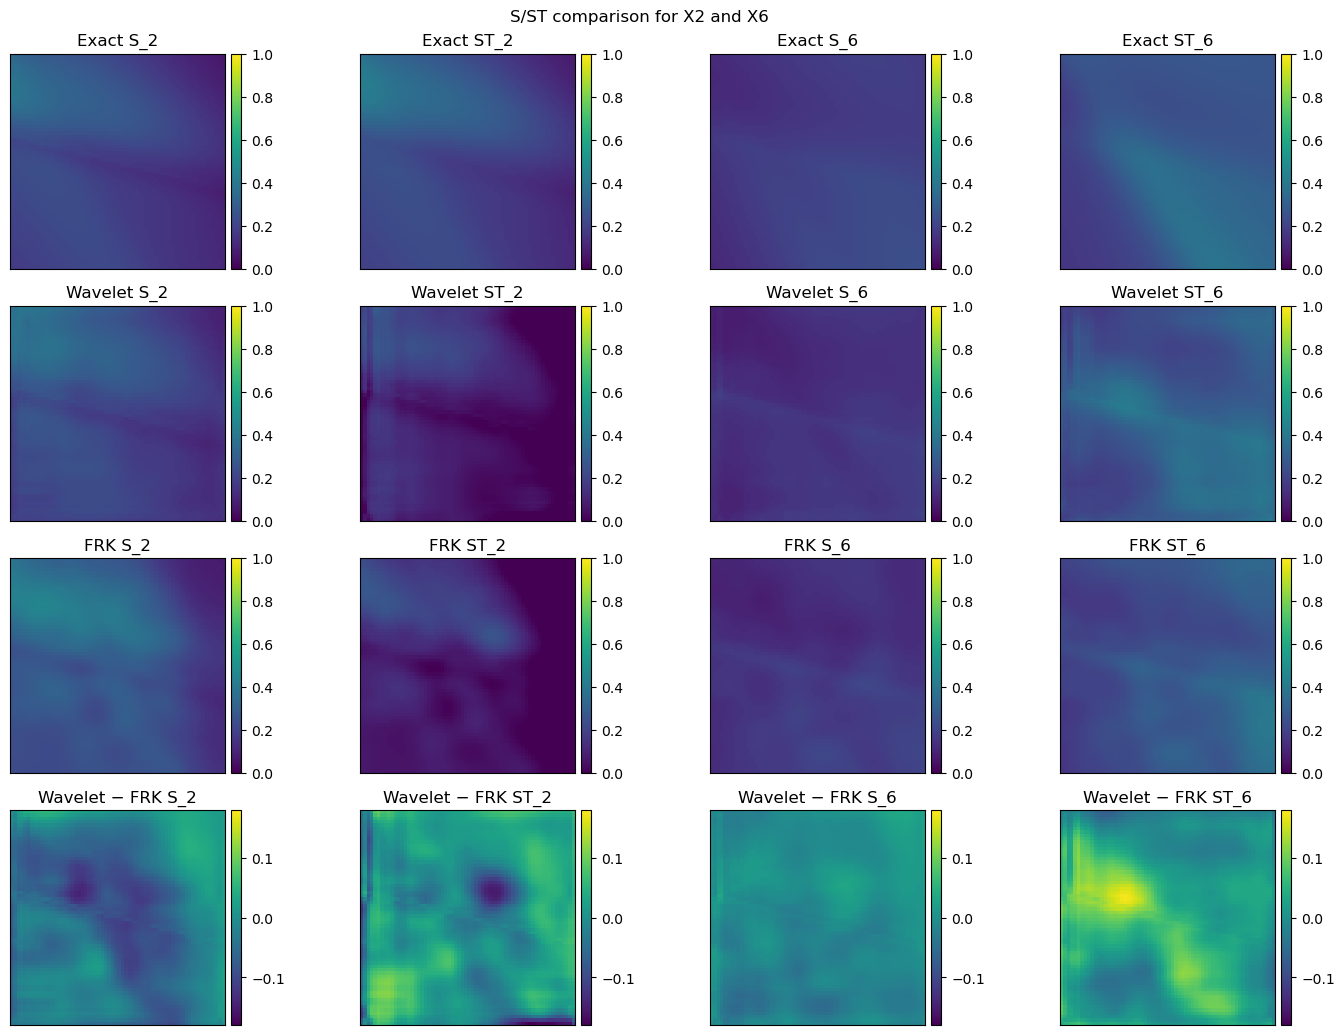

In [6]:
from marrel_pipeline.plotting import plot_s2_st2_s6_st6_comparison

fig = plot_s2_st2_s6_st6_comparison(
    S_exact=S_exact, ST_exact=ST_exact,
    S_wavelet=S_w, ST_wavelet=ST_w,
    S_frk=S_f, ST_frk=ST_f,
    inputs=(2,6),
    figsize=(14,10)
)
plt.show()


In [ ]:
fig.savefig("compare_S2_ST2_S6_ST6.png", dpi=200, bbox_inches="tight")
print("Saved compare_S2_ST2_S6_ST6.png")
